## Decision Tree

- 지도 학습
- 일련의 질문에 근거하여 주어진 데이터를 소집단으로 분류/회귀 분석 기법
- 최적의 질문 찾기
  - 정보이득(Information Gain)이 최대가 되도록
  - 데이터 불순도(Impurity)가 최소가 되도록
  - 데이터 불순도 측정법 : 분류-지니 인덱스(Gini Index), 엔트로피(Entropy)
  - 다른 알고리즘에 비해 시간이 오래 걸림

In [ ]:
회귀용 : LinearRegression, Lasso, Ridge
분류용 : LogisticRegression

#KNeighborsClassifier
#KNeighborsRegressor
#DecisionTreeClassifier
#DecisionTreeRegressor
#RandomForestClassifer
#RandomForestRegressor

In [ ]:
스무고개

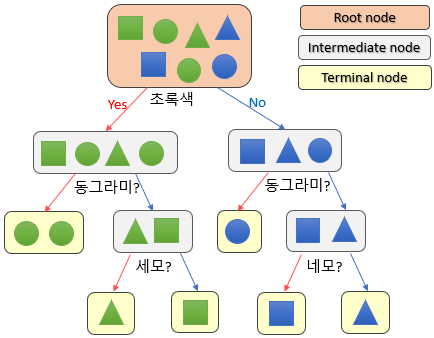

In [ ]:
모양 또는 색 중에서 무엇을 먼저, 어떤 기준으로 나누어야 할까?
=> 불순도가 낮아지는 방향으로 나누어야 한다!
=> 불순도가 낮은 것부터 질문으로 사용함, 불순도가 높은 경우 많은 정보를 가지고 있어 구분이 어려움

불순도(Impurity)
- 동일하지 않은 것이 섞여 있는 정도
- 불순도를 수치화한 지표 : 엔트로피(Entropy)와 지니계수(GiniIndex)
- ID3 : 불순도 계산에 Entropy를 사용한 알고리즘 
- CART : 불순도 계산에 Gini-Index를 사용한 알고리즘
- ID3 설명 : ```https://leedakyeong.tistory.com/entry/Decision-Tree%EB%9E%80-ID3-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98``` 

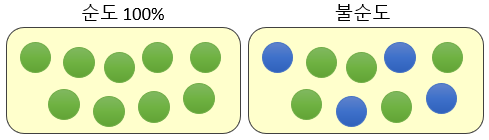

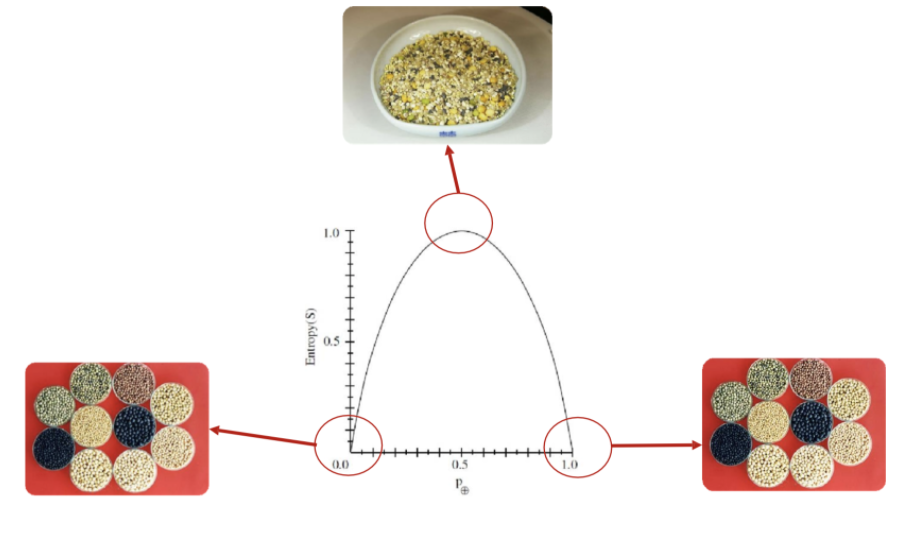

## 1.Decision Tree 예1 - 이상형 고르기 

- 외모, 성격, 건강을 조건으로 이상형을 분류하는 예제
> 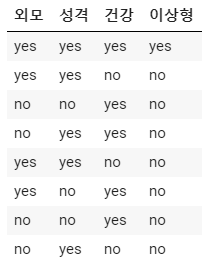


- sklearn.tree.DecisionTreeClassifier(*, criterion, ...)
  - criterion : 'gini'(default), 'entropy'
  - max_depth = None, 트리의 최대 깊이
  - min_sample_split = 2, 노드내에서 분할이 필요한 최소의 샘플 수
  - max_features = None, 최적의 분할을 찾기 위해 고려할 Feature의 수
     - int : Feature의 수, float : 비율, or {'auto', 'sqrt', 'log2'}
  - max_leaf_nodes=None : 최대 말단 노드 개수
  - ```feature_importances_``` : 가장 많은 분류를 만든 속성

- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

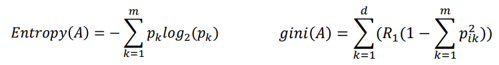

In [1]:
import numpy as np
data = np.array([[1,1,1,1],
                 [1,1,0,0],
                 [0,0,1,0],
                 [0,1,1,0],
                 [1,1,0,0],
                 [1,0,1,0],
                 [0,0,1,0],
                 [0,1,0,0]])

X = data[:, :-1]
y = data[:, -1]
print(X, y)

[[1 1 1]
 [1 1 0]
 [0 0 1]
 [0 1 1]
 [1 1 0]
 [1 0 1]
 [0 0 1]
 [0 1 0]] [1 0 0 0 0 0 0 0]


In [ ]:
[1 1 1] 1
[1 1 0] 0
[1 0 1] 0
[1 0 1] 0

In [ ]:
[0 0 1] 0
[0 1 1] 0
[0 0 1] 0
[0 1 0] 0

In [4]:
# Entropy
import numpy as np
def E(pos, neg):
    tot = pos + neg
    TR = pos/tot
    FR = neg/tot
    a = -(TR*np.log2(TR)) if TR != 0 else 0
    b = -(FR*np.log2(FR)) if FR != 0 else 0
    return a + b
    
a = E(1, 7)
# 불순도를 구함
apperance = ((4/8)*E(1, 3)) + ((4/8)*E(0, 4))
character = ((5/8)*E(1, 4)) + ((3/8)*E(0, 3))
health = ((5/8)*E(1, 4)) + ((3/8)*E(0, 3))
# 불확실성이 가장 많이 감소하는 apperance를 선택함 (가장 작은 entropy 선택)
print('%.4f  %.4f %.4f %.4f ' % (a, apperance, character, health))

0.5436  0.4056 0.4512 0.4512 


- 위 결과를 보고 불순도가 가장 작은 첫번째 질문은 appearance로 선정

In [5]:
# Gini
def G(pos, neg):
    if not pos or not neg: return 0
    tot = pos + neg
    return 1 - (pos/tot)**2 - (neg/tot)**2

a = G(1, 7)
apperance = (4/8)*G(4, 0) + (4/8)*G(3, 1)
character = (5/8)*G(4, 1) + (3/8)*G(3, 0)
health = (5/8)*G(4, 1) + (3/8)*G(3, 0)

# 불순도가 가장 낮은 apperence를 선택함 0.1875
print('%.4f, %.4f %.4f %.4f' % (a, apperance, character, health))

0.2188, 0.1875 0.2000 0.2000


- 위 결과를 보고 Gini가 가장 작은 첫번째 질문은 appearance로 선정

In [ ]:
##  Deision Tree 이상형(entropy)
import numpy as np
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier

# 1 : yes, 2 : no
data = np.array([[1,1,1,1],
                 [1,1,0,0],
                 [0,0,1,0],
                 [0,1,1,0],
                 [1,1,0,0],
                 [1,0,1,0],
                 [0,0,1,0],
                 [0,1,0,0]])

X = data[:, :-1]
y = data[:, -1]
print(X, y)
# criterion='entropy', random_state=0사용하여 DecisionTreeClassifier를 생성하고 학습한다, 
tree_ent = DecisionTreeClassifier(criterion='entropy', random_state=0).fit(X, y)

# training 정확도를 출력한다
print("Train Accurray: ", tree_ent.score(X, y) )

# X에 대한 예측 결과를 출력한다.
print(tree_ent.predict(X))

[[1 1 1]
 [1 1 0]
 [0 0 1]
 [0 1 1]
 [1 1 0]
 [1 0 1]
 [0 0 1]
 [0 1 0]] [1 0 0 0 0 0 0 0]
Train Accurray:  1.0
[1 0 0 0 0 0 0 0]


In [ ]:
# feature_importances_ : Tree 계열에서 사용할 수 있는 특성의 중요도 조회 속성
# 분순도를 기반으로 계산되며 정규화되었기 때문에 총합은 1

# 모델의 특성 중요도를 조회한다
for a, b in zip(tree_ent.feature_importances_, ["Appearance", "Character", "Health"]):
    print(b, round(a, 3))

Appearance 0.254
Character 0.46
Health 0.286


In [ ]:
# 트리의 max_depth 출력
tree_ent.get_depth()

3

In [ ]:
# Decision Tree - 이상형(Gini)
import numpy as np
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier

# criterion = 'gini', random_state=0 
# gini ==> default, 사용하여 DecisionTreeClassifier를 생성하고 학습한다, 
tree_gini = DecisionTreeClassifier(criterion='gini', random_state=0)
tree_gini.fit(X, y)

# training 정확도를 출력한다
print("Train Accurray: ", tree_gini.score(X, y) )

# X에 대한 예측 결과를 출력한다.
print(tree_gini.predict(X))

Train Accurray:  1.0
[1 0 0 0 0 0 0 0]


In [ ]:
# feature_importances_ 를 사용해 모델의 특성 중요도를 조회한다
for a, b in zip(tree_gini.feature_importances_, ["Appearance", "Character", "Health"]):
    print(b, round(a, 3))

Appearance 0.143
Character 0.571
Health 0.286


## 2.Decision Tree 시각화
- pydotplus
    - pip install pydotplus
- grphviz
    - 실행파일 설치 : https://graphviz.gitlab.io/download/
    - windows : https://graphviz.gitlab.io/_pages/Download/Download_windows.html
    - `pip install graphviz`


In [ ]:
!pip install pydotplus graphviz

In [ ]:
# export_graphviz의 argument

# out_file=None : 결과를 파일로 저장하지 않겠다.
# filled=True : 상자 채우기
# rounded=True : 상자모서리 둥그렇게 만들기
# special_characters=True : 상자안에 내용 넣기
# impurity : 불순도 표시 (default=True)

In [ ]:
# 설치가 되지 않는 경우 
from sklearn.tree import export_graphviz
export_graphviz(tree_ent, out_file='tree_ent.dot',
                feature_names=["Appearance", "Character", "Health"],
                class_names=["No", "Yes"],
                impurity=True, 
                rounded=True,
                filled=True)
# tree_model.dot 시각화 사이트 # http://webgraphviz.com/
# tree_ent.dot 파일을 메모장 등으로 열어서 웹에 복사한다

In [ ]:
# 설치가 된 경우 
import pydotplus
import graphviz
from sklearn.tree import export_graphviz
from IPython.core.display import Image

def showTree(dt, feature_names, class_names):
    dot_data = export_graphviz(dt,
                               out_file=None,
                               feature_names=feature_names,
                               class_names=class_names,                               
                               impurity=True, 
                               rounded=True,
                               filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data) 
    return Image(graph.create_png())

In [ ]:
# 첫번째 줄 : 분류 기준
# entropy : 엔트로피값
# sample : 분류한 데이터 개수
# value : 클래스별 데이터 개수  # NO, Yes의 개수
# class : 예측한 답

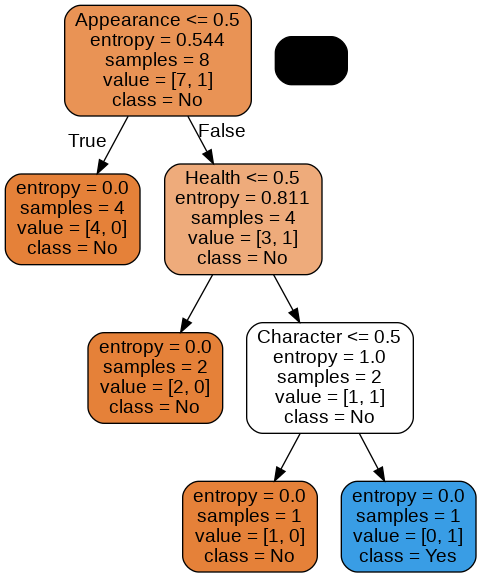

In [ ]:
showTree(tree_ent, ["Appearance", "Character", "Health"], ["No", "Yes"])

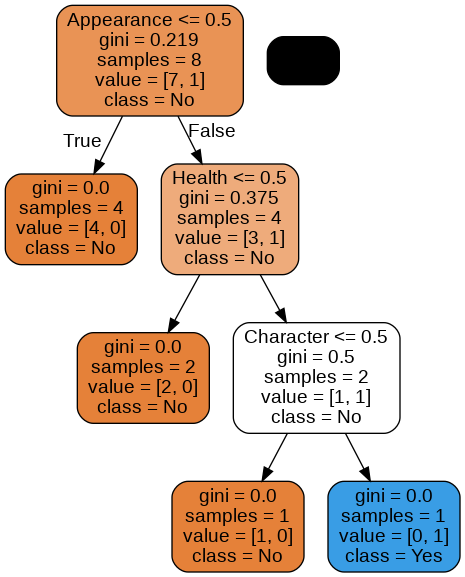

In [ ]:
showTree(tree_gini, ["Appearance", "Character", "Health"], ["No", "Yes"])

## 3.회귀, 분류를 위한 함수 준비

In [ ]:
# [1] get_classfication_scores 함수 만들기
# accuracy, precision, recall, f1
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

def get_classfication_scores(model, x_test, y_test):
    y_pred =
    A = 
    B = 
    C = 
    D = 
    return [round(x, 4) for x in [A, B, C, D]]

In [ ]:
# [2] get_regression_scores 함수 만들기
# r2_score, mae, mse, msle
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle

def get_regression_scores(model, x_test, y_test):
    y_pred = 
    A = 
    B = 
    C = 
    D = 
    return [round(x, 4) for x in [A, B, C, D]]

In [ ]:
# [3] make_data 함수 만들기
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

def make_data(data, kind='classfication'):
    # 데이터를 X, y로 분리한다
    X = 
    y = 

    # 스케일링 처리
    X_scaled = 

    # train test 분리 (7.5:2.5), 층화추출, random_state=0
    stratify = y if kind =='classfication' else None
    result = 
    
    return result


In [ ]:
# [4] make_classfication_model 함수 만들기

def make_classfication_model(name, model, data):
    # data 분리
    x_train, x_test, y_train, y_test = data

    # 모델 학습  
    model

    # train_scores, test_score 구하기
    train_scores = 
    test_scores = 

    # DataFrame으로 만들어 x_test, y_test 와 함께 반환하기
    index = ['name', 'model',
             'accuracy1', 'precision1', 'recall1', 'f1_1',
             'accuracy2', 'precision2', 'recall2', 'f1_2']
    data = [name, model] + train_scores + test_scores
    return pd.Series(data, index=index).to_frame().T

In [ ]:
# [5] make_regression_data, make_regression_model 함수 만들기
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

def make_regression_model(name, model, data):
    # 데이터 나누기
    x_train, x_test, y_train, y_test = data

    # 모델 학습  
    model

    # train_scores, test_score 구하기
    train_scores = 
    test_scores = 

    # DataFrame으로 만들어 x_test, y_test 와 함께 반환하기
    index = ['name', 'model',
             'r2_score1', 'mae1', 'mse1', 'msle1',
             'r2_score2', 'mae2', 'mse2', 'msle2']
    data = [name, model] + train_scores + test_scores
    return pd.Series(data, index=index).to_frame().T

## 4.Classification Tree

### 위스콘신 유방암 진단 (이진 분류)

### 4-1.데이터 준비

In [ ]:
!git clone https://github.com/Soyoung-Yoon/data_05

Cloning into 'data_05'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [ ]:
import pandas as pd

# [1] 암 데이터를 가져와 cancer로 이름 지정 및 make_data를 사용해 데이터 분리
# target : ['malignant' 'benign']  : 악성(0), 양성(1)
cancer = 
data_cancer = 

### 4-2.모델 학습 및 평가
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [ ]:
# [2] DecisionTreeClassifier를 사용한 모델 학습
from sklearn.tree import DecisionTreeClassifier # 분류

# DecisionTreeClassifier 모델 생성 후, make_classfication_model 함수 호출
model = 
result = 
result

,name,model,accuracy1,precision1,recall1,f1_1,accuracy2,precision2,recall2,f1_2
0,DT,DecisionTreeClassifier(),1.0,1.0,1.0,1.0,0.9091,0.9425,0.9111,0.9266


In [ ]:
# [3] feature_importances_ : Tree 계열에서 사용할 수 있는 특성의 중요도 조회 속성
# 분순도를 기반으로 계산되며 정규화되었기 때문에 총합은 1
# 모델의 특성 중요도를 조회한다


array([0.        , 0.03583795, 0.        , 0.        , 0.00891967,
       0.        , 0.00668975, 0.        , 0.01101841, 0.        ,
       0.01223453, 0.        , 0.        , 0.00999282, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00401385,
       0.03687207, 0.02958161, 0.72534081, 0.        , 0.00931787,
       0.        , 0.        , 0.11018067, 0.        , 0.        ])

In [ ]:
# [4] 모델의 depth를 출력해 본다


5

### 4-3.특성 중요도 시각화


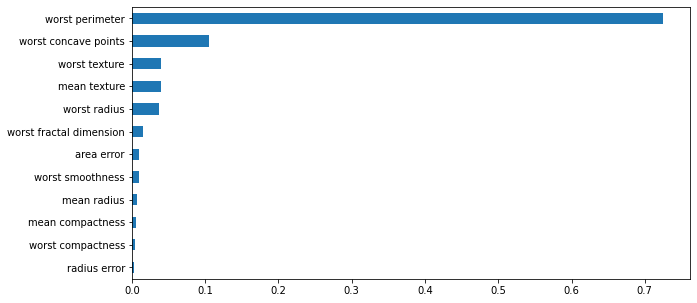

In [ ]:
# [5] 특성 중요도를 시각화
# 1. 중요도(feature_importances_) 에 대해서 Series를 작성합니다. 
#    이때, Series의 index로 feature_names를 지정합니다.
# 2. Series에서 0이 아닌 값들만 대상으로 정렬하여 barh 종류의 차트를 그립니다
#    Series.plot(kind='barh', figsize=(10, 5))  사용

import pandas as pd
import matplotlib.pyplot as plt

fi = pd.Series(model.feature_importances_, index=cancer.columns[:-1])
fi[fi!=0].sort_values(ascending=True).plot(kind='barh', figsize=(10, 5))
plt.show()

In [ ]:
# [6] feature_importances_ 중 0보다 큰 것을 출력해 본다


worst perimeter            0.725341
worst concave points       0.105163
worst area                 0.036872
worst texture              0.029582
mean texture               0.028312
worst smoothness           0.014335
mean symmetry              0.011018
area error                 0.009993
texture error              0.009804
mean smoothness            0.008920
fractal dimension error    0.007526
worst concavity            0.006690
worst symmetry             0.004014
radius error               0.002431
dtype: float64

### 4-4.모델 복잡도 제어
- Tree 계열 모델은 쉽게 과대적합되는 경향이 있어 parameter tunning이 매우 중요함
- 가장 쉽고 간단한 방법은 트리가 너무 깊어지지 않도록 트리의 깊이(max_depth)를 제어 하는 것
- 이외에도 leaf 노드의 최소 샘플 수(min_samples_leaf), leaf 노드의 최대수(max_leaf_nodes), 최대 특성 수(max_features), 노드를 분할하기 위한 최소 샘플수(min_samples_split)를 지정

In [ ]:
# 질문이 많이 만들어지지 않도록 하고 싶다 (=단순한 모델로 만들기, 일반화)
# max_depth : 작게
# max_leaf_nodes : 작게
# max_features : 작게
# min_samples_leaf (default=1): (leaf - 단말노드, 마지막에 있는 노드) : 크게
# min_samples_split (default=2) : 크게

In [ ]:
# [7] make_classfication_model 함수로 추가 모델 생성 
# modelA : max_depth=3, random_state=0 으로 하는 DecisionTreeClassifier 모델 생성
# modelB : max_depth=5, random_state=0 으로 하는 DecisionTreeClassifier 모델 생성

from sklearn.tree import DecisionTreeClassifier

modelA = 
modelB = 
resultA = 
resultB = 


,name,model,accuracy1,precision1,recall1,f1_1,accuracy2,precision2,recall2,f1_2
0,DT3,"DecisionTreeClassifier(max_depth=3, random_sta...",0.9765,0.9777,0.985,0.9813,0.9161,0.9432,0.9222,0.9326
0,DT5,"DecisionTreeClassifier(max_depth=5, random_sta...",1.0,1.0,1.0,1.0,0.9021,0.9419,0.9,0.9205


### 4-5.Graphviz 설치, Rule 뽑기¶

In [ ]:
!pip install graphviz

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(modelB, out_file='model3.dot',
                feature_names=cancer.columns[:-1],
                class_names=['악성', '양성'],
                impurity=True, 
                filled=True)
# tree_model.dot 시각화 사이트# http://webgraphviz.com/
# model3.dot 파일을 메모장 등으로 열어서 웹에 복사한다

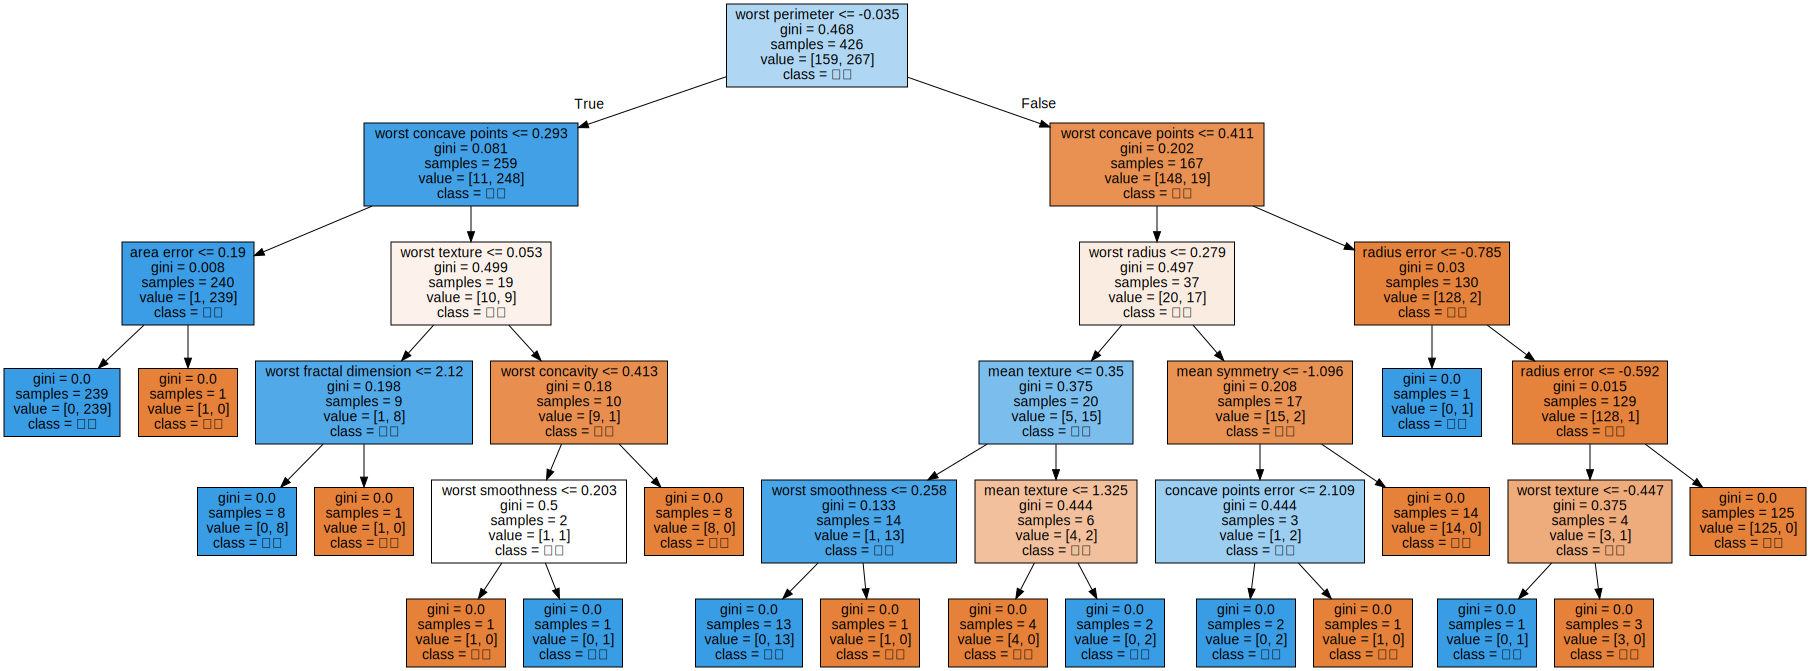

In [ ]:
import graphviz
with open('model3.dot') as f:
    img = f.read()
graphviz.Source(img)

In [ ]:
# [8] modelA의 예측값을 5개 출력한다
x_train, x_test, y_train, y_test = data_cancer


array([1, 0, 0, 1, 0])

In [ ]:
# [9] modelA의 예측 확률 (predict_proba)를 5개 출력한다


array([[0.        , 1.        ],
       [0.99224806, 0.00775194],
       [0.99224806, 0.00775194],
       [0.        , 1.        ],
       [0.88235294, 0.11764706]])

In [ ]:
# [10] modelA의 영향력 있는 feature만 확인한다
# 영향력 있는 feature란 feature_importances_ 의 값이 0이 아닌 것을 의미한다
# feature_name 과 feature_value에 들어갈 내용을 작성하라
s = pd.Series(modelA.feature_importances_, 
              index= cancer.columns[:-1]).sort_values()
s = 
s

texture error           0.010694
area error              0.010900
worst texture           0.032268
worst radius            0.040220
worst concave points    0.114713
worst perimeter         0.791205
dtype: float64

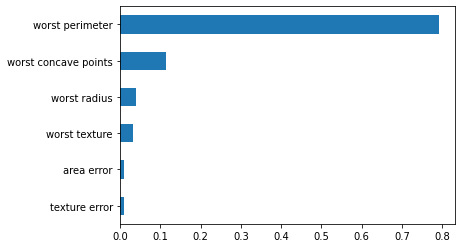

In [ ]:
# [11] s를 그래프로 표시한다
# Series.plot(kind='barh') 사용
import pandas as pd
import matplotlib.pyplot as plt


plt.show()

## 5.Regression Tree 
- class sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)

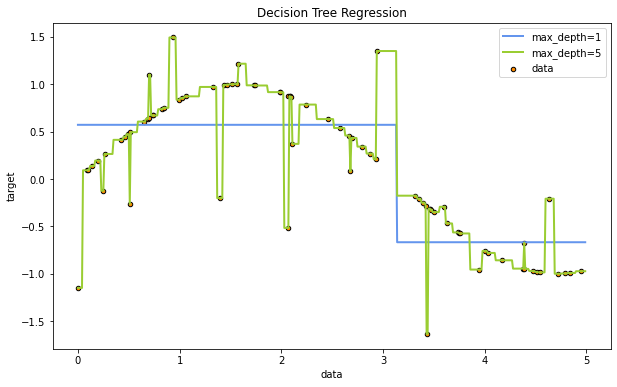

In [ ]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=1)
regr_2 = DecisionTreeRegressor()
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=1", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### 보스턴 주택 가격 예측

### 5-1.데이터 준비

In [ ]:
!git clone https://github.com/Soyoung-Yoon/data_05

In [ ]:
import pandas as pd

# [1] 보스턴 데이터를 가져와 boston 으로 이름 지정, make_data로 데이터 분리
# make_data에서 kind='regression' 지정
boston = 
data_boston = 

### 5-2.모델 학습 및 평가

In [ ]:
# [2] DecisionTreeRegressor 를 사용한 모델 학습
from sklearn.tree import DecisionTreeRegressor # 회귀

# DecisionTreeRegressor 모델 생성 후, make_regression_model에 함수 호출
model = 
result = 
result

,name,model,r2_score1,mae1,mse1,msle1,r2_score2,mae2,mse2,msle2
0,DT,DecisionTreeRegressor(),1.0,0.0,0.0,0.0,0.6296,3.3701,30.2644,0.0536


In [ ]:
# [3] 학습된 모델에서 어떤 특성이 중요한지 조회하여 본다


array([3.82174670e-02, 3.53212394e-05, 7.77523111e-03, 1.87637641e-05,
       1.37819387e-02, 2.43714776e-01, 9.63341451e-03, 2.79779391e-02,
       1.32803941e-03, 1.31636069e-02, 3.11891456e-02, 6.42774732e-03,
       6.06736609e-01])

In [ ]:
# [4] tree의 깊이 조회


18

### 5-3.특성 중요도 시각화

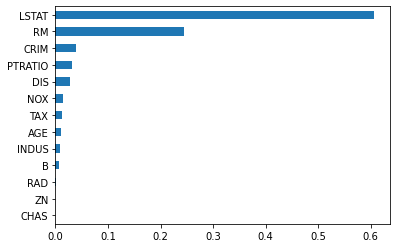

In [ ]:
# [5] 특성 중요도를 시각화
# 1. 중요도(feature_importances_) 에 대해서 Series를 작성합니다. 
#    이때, Series의 index로 feature_names를 지정합니다.
# 2. Series에서 0이 아닌 값들만 대상으로 정렬하여 barh 종류의 차트를 그립니다
#    Series.plot(kind='barh', figsize=(10, 5))  사용

import pandas as pd
fi = pd.Series(model.feature_importances_, boston.columns[:-1])
fi = 

plt.show()

In [ ]:
# [6] feature_importances_ 중 0보다 큰 것을 출력해 본다


LSTAT      0.586488
RM         0.242504
CRIM       0.053755
PTRATIO    0.030633
DIS        0.028285
NOX        0.019058
INDUS      0.011202
TAX        0.011037
B          0.007812
AGE        0.005111
RAD        0.003629
ZN         0.000466
CHAS       0.000023
dtype: float64

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='model.dot',
                feature_names=boston.columns[:-1],
                impurity=True, 
                filled=True)
# tree_model.dot 시각화 사이트# http://webgraphviz.com/
# model.dot 파일을 메모장 등으로 열어서 웹에 복사한다

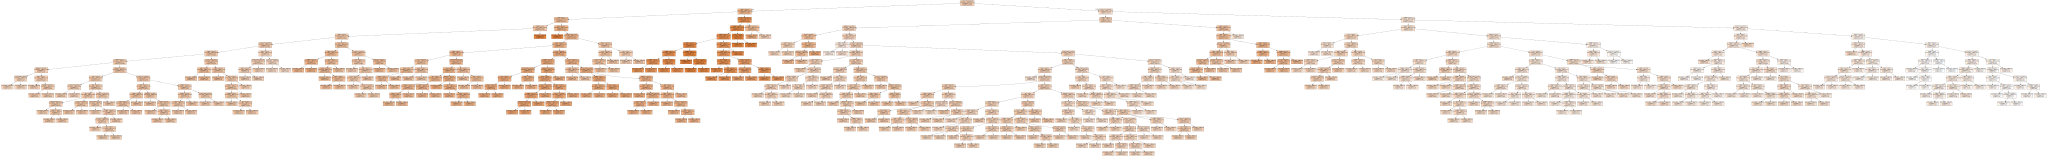

In [ ]:
# Tree가 깊고 복잡함
with open('model.dot') as f :
    img = f.read()
graphviz.Source(img)

### 5-4.모델 복잡도 제어

In [ ]:
# [8] make_regression_model 함수로 추가 모델 생성 
# modelA : max_depth=3, random_state=0 으로 하는 DecisionTreeRegressor 모델 생성
# modelB : max_depth=5, random_state=0 으로 하는 DecisionTreeRegressor 모델 생성

from sklearn.tree import DecisionTreeRegressor

modelA = DecisionTreeRegressor(max_depth=3, random_state=0)
modelB = DecisionTreeRegressor(max_depth=5, random_state=0)
resultA = make_regression_model('DT3', modelA, data)
resultB = make_regression_model('DT5', modelB, data)
pd.concat([resultA, resultB], axis=0)

,name,model,r2_score1,mae1,mse1,msle1,r2_score2,mae2,mse2,msle2
0,DT3,"DecisionTreeRegressor(max_depth=3, random_stat...",0.8291,2.7315,14.5794,0.0325,0.6354,3.4112,29.7845,0.0501
0,DT5,"DecisionTreeRegressor(max_depth=5, random_stat...",0.9292,1.9406,6.0393,0.0154,0.6552,3.1784,28.1683,0.0453
